In [ ]:
# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
os.chdir('D:/Data for Project/IMDB top 250 shows')

In [5]:
df=pd.read_csv('IMDB.csv')

In [6]:
df.head()

,Name,Year,Episodes,Type,Rating,Image-src,Description,Name-href
0,1. Breaking Bad,2008–2013,62 eps,TV-MA,9.5,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,A chemistry teacher diagnosed with inoperable ...,https://www.imdb.com/title/tt0903747/?ref_=cht...
1,2. Planet Earth II,2016,6 eps,TV-G,9.5,https://m.media-amazon.com/images/M/MV5BMGZmYm...,David Attenborough returns with a new wildlife...,https://www.imdb.com/title/tt5491994/?ref_=cht...
2,3. Planet Earth,2006,11 eps,TV-PG,9.4,https://m.media-amazon.com/images/M/MV5BMzMyYj...,A documentary series on the wildlife found on ...,https://www.imdb.com/title/tt0795176/?ref_=cht...
3,4. Band of Brothers,2001,10 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BMTI3OD...,The story of Easy Company of the U.S. Army 101...,https://www.imdb.com/title/tt0185906/?ref_=cht...
4,5. Chernobyl,2019,5 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BNTdkN2...,"In April 1986, an explosion at the Chernobyl n...",https://www.imdb.com/title/tt7366338/?ref_=cht...


In [7]:
df.shape

(250, 8)

In [8]:
df.columns

Index(['Name', 'Year', 'Episodes', 'Type', 'Rating', 'Image-src',
       'Description', 'Name-href'],
      dtype='object')

In [9]:
df.drop(['Image-src','Description', 'Name-href'],axis=1,inplace=True)

In [10]:
df.head()

,Name,Year,Episodes,Type,Rating
0,1. Breaking Bad,2008–2013,62 eps,TV-MA,9.5
1,2. Planet Earth II,2016,6 eps,TV-G,9.5
2,3. Planet Earth,2006,11 eps,TV-PG,9.4
3,4. Band of Brothers,2001,10 eps,TV-MA,9.4
4,5. Chernobyl,2019,5 eps,TV-MA,9.4


In [11]:
df['Episodes']=df.Episodes.str.split(' ').str.get(0)

In [12]:
df.head()

,Name,Year,Episodes,Type,Rating
0,1. Breaking Bad,2008–2013,62,TV-MA,9.5
1,2. Planet Earth II,2016,6,TV-G,9.5
2,3. Planet Earth,2006,11,TV-PG,9.4
3,4. Band of Brothers,2001,10,TV-MA,9.4
4,5. Chernobyl,2019,5,TV-MA,9.4


In [13]:
df['Year']=df.Year.str.split('–').str.get(0)

In [14]:
df.head()

,Name,Year,Episodes,Type,Rating
0,1. Breaking Bad,2008,62,TV-MA,9.5
1,2. Planet Earth II,2016,6,TV-G,9.5
2,3. Planet Earth,2006,11,TV-PG,9.4
3,4. Band of Brothers,2001,10,TV-MA,9.4
4,5. Chernobyl,2019,5,TV-MA,9.4


In [15]:
df.value_counts('Type')

Type
TV-MA        108
TV-14         77
TV-PG         47
TV-G           5
Not Rated      3
TV-Y7-FV       2
PG-13          1
TV-Y           1
TV-Y7          1
dtype: int64

In [16]:
df.drop(['Name','Type'],axis=1,inplace=True)

In [17]:
df.head()

,Year,Episodes,Rating
0,2008,62,9.5
1,2016,6,9.5
2,2006,11,9.4
3,2001,10,9.4
4,2019,5,9.4


In [18]:
# scaling Data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss=StandardScaler()

In [21]:
x=pd.DataFrame(ss.fit_transform(df),columns=ss.get_feature_names_out())

In [22]:
x

,Year,Episodes,Rating
0,0.080354,-0.100800,3.206767
1,0.720629,-0.599104,3.206767
2,-0.079714,-0.554612,2.772010
3,-0.479886,-0.563511,2.772010
4,0.960732,-0.608002,2.772010
...,...,...,...
245,0.160389,1.233943,-1.140802
246,-0.399852,-0.403342,-0.706045
247,0.160389,-0.269867,-1.140802
248,0.560560,-0.341054,-0.706045


In [23]:
# Model-Building

In [24]:
from sklearn.cluster import KMeans

In [25]:
km=KMeans(n_clusters=3)

In [26]:
km.fit(x)

KMeans(n_clusters=3)

In [27]:
labels=km.labels_

In [28]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2])

In [32]:
# checking for best no of clusters

In [29]:
from yellowbrick.cluster import kelbow_visualizer

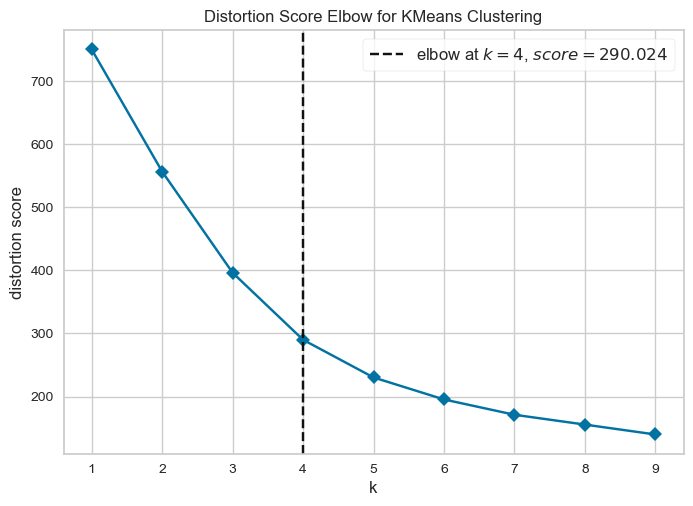

In [30]:
kv=kelbow_visualizer(km,x,k=range(1,10),timings=False)

In [ ]:
# Model-building

In [31]:
km1=KMeans(n_clusters=4)

In [32]:
km1.fit(x)

KMeans(n_clusters=4)

In [33]:
labels1=km1.labels_

In [34]:
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 1, 3,
       3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 3, 3, 1, 3,
       1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 3, 1, 2, 1,
       1, 1, 1, 1, 1, 3, 1, 0, 2, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3,
       1, 3, 0, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 3, 1, 1, 1, 1, 1, 1])